# Diode voltage

Let's compute the Diode voltage from almost first principles (skipping the quantum mechanics).

First, some constants

In [111]:
from scipy import constants

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="dark")
h = constants.physical_constants["Planck constant"][0]
k = constants.Boltzmann
pi = constants.pi
m0 = constants.m_e
q = constants.physical_constants["elementary charge"][0]
eV = constants.physical_constants["electron volt"][0]
cm3 = 1e-6
m = 1e3

# |----------------- Ec = Conduction band
# |  |
# |  Eg  = Band gap
# |  |
# |  |
# |----------------- Ev = Valence band
#
Eg = 1.12 *eV #Bandgap of Silicon, changes with temperature, but we ignore that

In his [Semiconductor Fundamentals](https://nanohub.org/courses/SFUN/2020x/) course, Mark Lundstrøm, has the following values for the effective mass of the electron and hole.

In [112]:
mn = m0*1.18
mp = m0*0.81

In the diode equation, the doping, Area, and current are parameters we can control

In [113]:
#- Doping concentration
NA = 1e19
ND = 1e19

#- Area of diode cm^2
A = 1e-8

I_c = 1e-6

The diffusion constant of electrons and holes are related to the [Einstein Relation](https://en.wikipedia.org/wiki/Einstein_relation_(kinetic_theory)) 

$$ D = \mu k T $$

One could assume that that the D increases with temperature, however, the mobility decreases with temperature, so I'm not sure how the diffusion constant changes with temperature. For now, let's assume they are constant

In [114]:
#- Diffusion constant of electrons
Dn = 36 # cm^2/s
Dp = 12 # cm^2/s

The mean life time ($\tau$), or the diffusion length ($L$), are related

$$ L = \sqrt{D \tau}$$

How long an electron can live in a material strongly depend on the doping density. I would assume probability of electron recombination is higher if there are more states in the valence band (higher acceptor doping), however, it depends on the Hamiltonian.

I've taken the numbers below from [Silicon Properties](http://www.ioffe.ru/SVA/NSM/Semicond/Si/electric.html)

In [115]:
#- Mean lifetime of electrons. Strongly depends on doping density.
tau_n = 8e-8
tau_p = 8e-8

## Normal calculation

The normal diode equation is 

$$I_D = q A n_i^2 \left(\frac{1}{N_A}\frac{D_n}{L_n} + \frac{1}{N_D}\frac{D_p}{L_p}\right)e^{qV_D/kT}$$

In [116]:
#- A temperature sweep
TNOM = 300.15
T = np.arange(TNOM-26.75 - 40,TNOM + 100)
C = T - 273.15

# Thermal voltage
V_T = k*T/q


To compute the intrinsic carrier concentration, we start with 

$$ n = \int_{E_C}^{\infty}{N(E)f(E)} $$

where

$$ f(E) = \frac{1}{e^{E - E_F} + 1}$$ 

for electrons. See [Fermi-Dirac Statistics](https://en.wikipedia.org/wiki/Fermi–Dirac_statistics)

In [117]:
Nc = 2*np.sqrt(np.power((2*pi*k*T*mn)/(h**2),3))
Nv = 2*np.sqrt(np.power((2*pi*k*T*mp)/(h**2),3))

ni = np.sqrt(Nc*Nv)*np.exp(-Eg/(2*k*T))*cm3

In [118]:

I_s = q*A*ni**2*(1/NA*np.sqrt(Dn/tau_n) + 1/ND*np.sqrt(Dp/tau_p))
print("Is = %.2g" %(I_s[int(len(I_s)/2)]))

Vd = V_T*np.log(I_c/I_s)

Is = 5.4e-21


Text(0, 0.5, 'Diode voltage [V]')

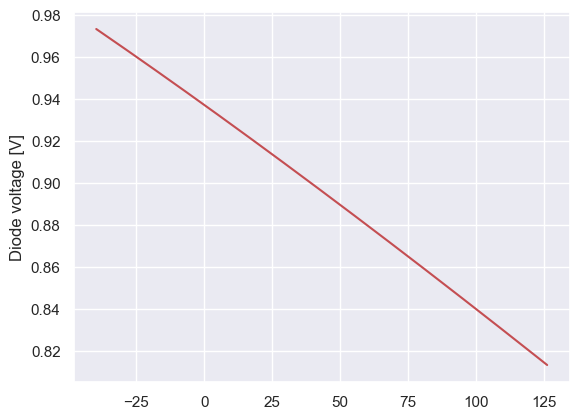

In [119]:
plt.plot(C,Vd,"r")
plt.grid(True)
plt.ylabel("Diode voltage [V]")

The diode equation, in my opinion, does not make it easy to see the temperature relation of $V_D$. 

Through some algebra, we can re-arrange, and get.

In [120]:
ell = np.log(I_c) - np.log(q*A*(1/NA*np.sqrt(Dn/tau_n) + 1/ND*np.sqrt(Dp/tau_p))) - 2*np.log(2) - 3/2*(np.log(mn) + np.log(mp)) \
    - 3* np.log(2*np.pi*k/(h**2)) - 2*np.log(cm3)

vd_paper = V_T*(ell - 3*np.log(T)) + Eg/eV

print(ell)

9.054741828436136


Text(0, 0.5, 'Diode voltage [V]')

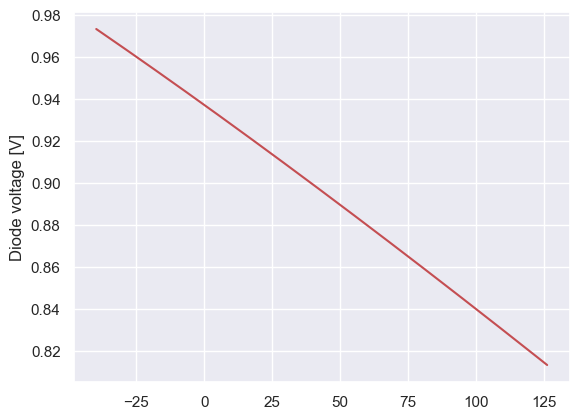

In [121]:
plt.plot(C,vd_paper,"r")
plt.grid(True)
plt.ylabel("Diode voltage [V]")

And we can confirm the two equations are the same

Text(0, 0.5, 'Error [V]')

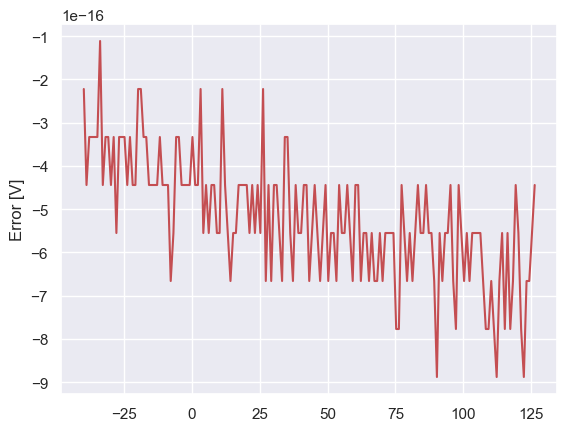

In [122]:
plt.plot(C,Vd-vd_paper,"r")
plt.grid(True)
plt.ylabel("Error [V]")
